In [18]:
import sys
sys.path.append("Utilities")
from resonance_fitting import *

In [19]:
from ResonanceFitter import *

C:\Users\csnipp\Documents\charles_qick


In [20]:
path = "G:\\My Drive\\Summer Research 2024\\data\\MKIDs\\03_resonator_spectroscopy\\07_29_2024\\17;16;08\\data.npz"
data = np.load(path)

fmin = data["frequencies"][0] / 10**-9
fmax = data["frequencies"][1] / 10**-9

I = data["I_avg"]
Q = data["Q_avg"]
fs = data["frequencies"]

fr = 5.1629

roughfit(fs / 10**9, I + 1j*Q, fr, plot=False)

{'f0': np.float64(5.162904930297109),
 'Q': np.float64(32268.137499663466),
 'phi': np.float64(-0.05259368806916533),
 'zOff': np.complex128(-0.02637253175904125+0.010102558611765946j),
 'Qc': np.float64(57178.21301369436),
 'tau1': np.float64(267.7326195440691),
 'Imtau1': np.float64(0.6230104499841584)}

In [21]:
finefit(fs / 10**9, I + 1j*Q, fr)

Fr from fit  [GHz]: 5.162899969990555
Fr min curve [GHz]: 5.162898


({'f0': np.float64(5.162899969990555),
  'Qr': np.float64(33626.7049445594),
  'phi': np.float64(-0.05767496670171935),
  'zOff': np.complex128(-0.026395960404745407+0.010231884327996354j),
  'QcHat': np.float64(62382.43346263051),
  'tau': np.complex128(270.824097336276+0.45177355576779427j),
  'Qc': np.float64(62486.33198024396)},
 {'f0': np.float64(1.3464465716624993e-07),
  'Qr': np.float64(58.978520741071065),
  'phi': np.float64(0.001325274424051516),
  'zOff': np.complex128(4.667440054540073e-06+7.932166588672134e-06j),
  'QcHat': np.float64(82.67360217462222),
  'tau': np.complex128(0.024359131925188897+0.024359131319818164j),
  'Qc': np.float64(82.67367477666097)})

In [22]:
def S21(f, fr, Qr, Qc_hat_mag, a, phi, tau):
    """A semi-obvious form of Gao's S21 function. e^(2j*pi*fr*tau) is incorporated into a."""
    S21 = a*np.exp(-2j*np.pi*(f-fr)*tau)*(1-(((Qr/Qc_hat_mag)*np.exp(1j*phi))/(1+(2j*Qr*(f-fr)/fr))))
    return S21

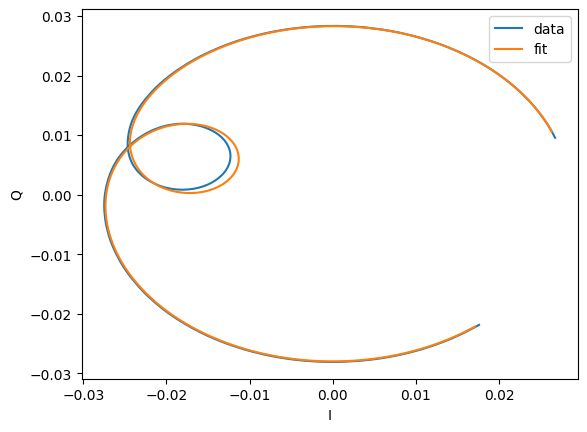

In [25]:
params = roughfit(fs / 10**9, I + 1j*Q, fr)
IQfit = resfunc3(fs / 10**9, params['f0'], params['Q'], params['Qc'], params['zOff'], params['phi'], params['tau1'] + 1j*params['Imtau1'])
Ifit = IQfit.real
Qfit = IQfit.imag
plt.plot(I, Q, label="data")
plt.plot(Ifit, Qfit, label="fit")
plt.xlabel("I")
plt.ylabel("Q")
plt.legend()

Text(0, 0.5, 'Volts')

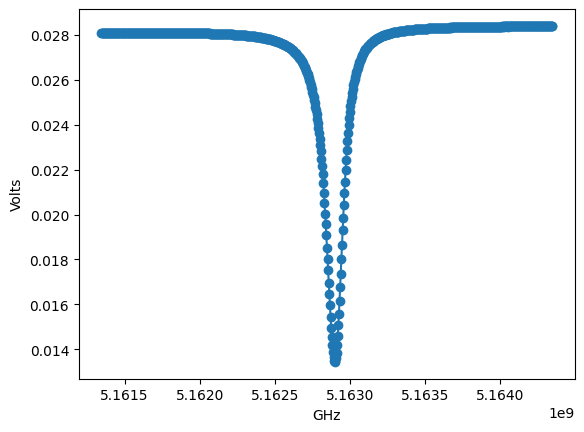

In [28]:
plt.plot(fs, np.abs(I + 1j*Q), '-o')
plt.xlabel("GHz")
plt.ylabel("Volts")